# Trabalho No. 1

- Aluno: Guilherme Lisboa de Oliveira (GRR20170414)

```{admonition} Questões

Parte I: Características da série temporal. Exercícios 1, 2, 3, 4, 5.

Parte II: Análise exploratória de dados. Exercícios 6 e 7 (a,b,c,d).

```

## Exercício 1

- a) $X_t = S_t + W_t$, para $t = 1, ..., 200$ onde:

$$
\begin{equation}
 S_t = \left\{ \begin{array}{cl} 0, & t=1,2,\cdots,100 \\ 10\exp\Big( -\frac{t-100}{20}\Big)\cos\Big(2\pi \frac{t}{4} \Big), & t=101,\cdots,200 \end{array}\right.\cdot
\end{equation}
$$

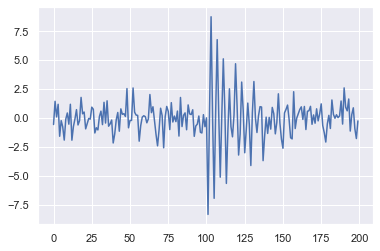

In [11]:
import numpy as np
import seaborn as sns
sns.set_theme(style="darkgrid")

questao1A_s_t = np.array([*np.zeros(100), *np.arange(101, 201)], dtype=float)
questao1A_s_t[100:] = 10 * np.exp(- np.subtract(questao1A_s_t[100:], 100)/ 20) * np.cos(2 * np.pi * questao1A_s_t[100:] / 4)

w_t = np.random.standard_normal(len(questao1A_s_t))

questao1A_X_t = questao1A_s_t + w_t

sns.lineplot(data=questao1A_X_t);

- b) $X_t = S_t + W_t$, para $t = 1, ..., 200$ onde:

$$
\begin{equation}
 S_t = \left\{ \begin{array}{cl} 0, & t=1,2,\cdots,100 \\ 10\exp\Big( -\frac{t-100}{200}\Big)\cos\Big(2\pi \frac{t}{4} \Big), & t=101,\cdots,200 \end{array}\right.\cdot
\end{equation}
$$

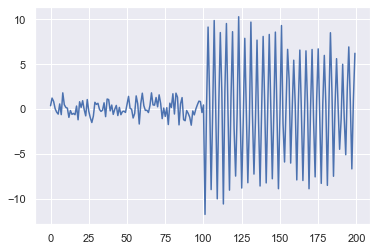

In [12]:
questao1B_s_t = np.array([*np.zeros(100), *np.arange(101, 201)], dtype=float)
questao1B_s_t[100:] = 10 * np.exp(- np.subtract(questao1B_s_t[100:], 100)/ 200) * np.cos(2 * np.pi * questao1B_s_t[100:] / 4)

w_t = np.random.standard_normal(len(questao1B_s_t))

questao1B_X_t = questao1B_s_t + w_t

sns.lineplot(data=questao1B_X_t);

## Exercício 2

a) Gerar $n=100$ observações da autorregressão $X_t=−0.9X_{t−2}+W_t$ com $\sigma^2_W=1$, usando o método descrito no Exemplo I.10. Em seguida, aplique o filtro médio móvel $V_t=(X_t+X_{t−1}+X_{t−2}+X_{t−3})/4$ para $X_t$, aos dados que você gerou. Agora mostre $X_t$ como uma linha e sobreponha $V_t$ como uma linha tracejada. Comente sobre o comportamento de $X_t$ e como aplicar o filtro de média móvel altera esse comportamento.

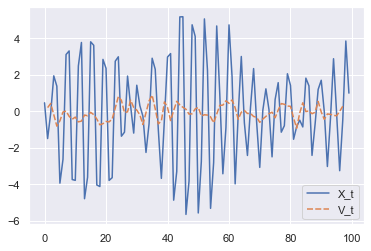

In [13]:
import statsmodels.tsa.filters.api as sm_filters
import pandas as pd

w_t = np.random.standard_normal(size=100)

questao2A_X_t = sm_filters.recursive_filter(w_t, [0, -0.9])
questao2A_V_t = sm_filters.convolution_filter(questao2A_X_t, [0.25, 0.25, 0.25, 0.25])

questao2A = pd.DataFrame({"X_t": questao2A_X_t, "V_t": questao2A_V_t})

sns.lineplot(data=questao2A);

b) Repetir (a) mas com $X_t=cos(2 \pi t / 4)$.

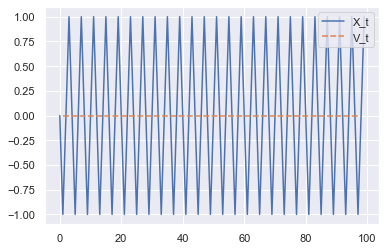

In [14]:
questao2B_X_t = np.array(np.arange(1, 101), dtype=float)
questao2B_X_t = np.cos(2 * np.pi * questao2B_X_t / 4)

questao2B_V_t = sm_filters.convolution_filter(questao2B_X_t, [0.25, 0.25, 0.25, 0.25])

questao2B = pd.DataFrame({"X_t": questao2B_X_t, "V_t": questao2B_V_t})

sns.lineplot(data=questao2B);

c) Repetir (b) mas com adição de ruído $N(0,1)$, $X_t=cos(2 \pi t/4)+W_t$.

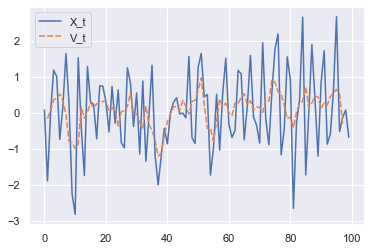

In [15]:
questao2C_X_t = questao2B_X_t + np.random.standard_normal(size=100)

questao2C_V_t = sm_filters.convolution_filter(questao2C_X_t, [0.25, 0.25, 0.25, 0.25])

questao2C = pd.DataFrame({"X_t": questao2C_X_t, "V_t": questao2C_V_t})

sns.lineplot(data=questao2C);

d) Compare e contraste (a) - (c); isto é, como a média móvel muda cada série.

$V_t$ suaviza as oscilações de seus respectivos $X_t$, sendo que na questão (a) a amplitude da suavização é menor por $X_t$ estar altamente correlacionada com $X_{t+4}$

## Exercício 3

$$
\gamma(s,t)= E \big( (X_s-\mu_s)(X_t-\mu_t)\big)= E (X_sX_t)-\mu_s\mu_t
$$

Onde $E(X_t) = \mu_t$

Multiplicando os argumentos da esperança, temos:

$$
\gamma(s,t) = E \big( X_sX_t - X_s\mu_t - X_t\mu_s + \mu_s\mu_t \big)
$$

Aplicando a esperança em cada produto, temos:

$$
\gamma(s,t) = E(X_sX_t) - E(X_s\mu_t) - E(X_t\mu_s) + E(\mu_s\mu_t)
$$

Como os valores de $\mu_s$ e $\mu_t$ não são variáveis aleatórias, retiramos da esperança:

$$
\gamma(s,t) = E(X_sX_t) - \mu_t E(X_s) - \mu_s E(X_t) + \mu_s\mu_t
$$

Um vez isoladas, podemos calcular $E(X_s) = \mu_s$ e $E(X_t) = \mu_t$:

$$
\gamma(s,t) = E(X_sX_t) - \mu_t\mu_s - \mu_s\mu_t + \mu_s\mu_t
$$

Portanto:

$$
\gamma(s,t) = E(X_sX_t) - \mu_s\mu_t
$$

## Exercício 4

Para as duas séries $X_t$, no Exercício 2 (a) e (b):

a) Calcular e traçar as funções de médias $\mu_X(t)$, para $t=1,2,...,200$.

Como não há termo dependente de $t$ no item (a), $E(X_t) = 0$

No item (b) temos $X_t=cos(2 \pi t/4)$, assim, $\mu_X(t) = E(cos(2 \pi t/4)) = cos(2 \pi t/4)$

b) Calcular a função de autocovariância $\gamma(s,t)$, para $s,t=1,...,200$.

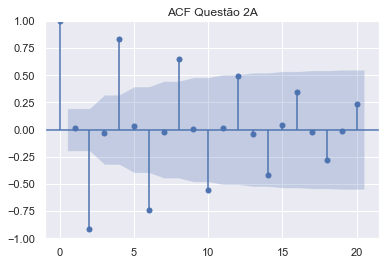

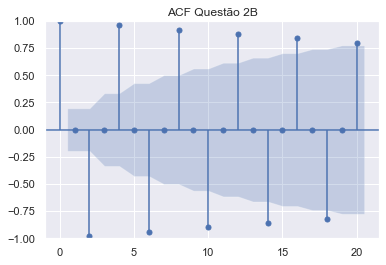

In [25]:
import statsmodels.graphics.tsaplots as sm_tsa_plots

sm_tsa_plots.plot_acf(questao2A_X_t, title="ACF Questão 2A");
sm_tsa_plots.plot_acf(questao2B_X_t, title="ACF Questão 2B");

## Exercício 5

Considere a série temporal $X_t=β_0+β_1t+W_t$, onde $β_0$ e $β_1$ são constantes e $W_t$ é um processo de ruído branco com variância $\sigma^2_W$.

a) Determine se $X_t$ é estacionário.

Seja $E(X_t) = E(β_0 + β_1t + W_t) = β_0 + β_1t$, vemos que $X_t$ não é estacionário pois $E(X_t)$ depende de $t$

b) Mostre que o processo $Y_t=X_t−X_{t−1}$ é estacionário.

Seja $Y_t = β_0 + β_1t + W_t − {β0 + β_1(t − 1) + W_{t−1}} = β_1 + W_t − W_{t−1}$.
Como $E(Y_t)$ depende apenas da constante $\beta_1$, o processo é estacionário

c) Mostre que a média do processo de média móvel

Seja $V_t = \frac{1}{2q + 1} \sum_{j = -q}^q X_{t-j}$, temos:

$E[V_t] = E[\frac{1}{2q + 1} \sum_{j = -q}^q X_{t-j}] = \frac{1}{2q+1}E[X_{t + q} + X_{t + q +1 + ... + X_t + X_{t - q -1} + X_{t - q}}]$

Sabendo que $E(X_t) = \beta_0 + \beta_1t$ do item (a), temos:
  
$E[V_t] = \frac{1}{2q + 1}((2q + 1) \beta_0 + \beta_1((t + q) + (t + q + 1) + ... + (t - q - 1) + (t - q)))$
 
$E[V_t]= \frac{1}{2q +1}((2q + 1) \beta_0 + \beta_1(2q + 1)t)$

$E[V_t]= \frac{2q + 1}{2q +1}( \beta_0 + \beta_1t)$

$E[V_t]= \beta_0 + \beta_1t$

## Exercício 6

Para um processo de médias móveis da forma $X_t=W_{t−1} + 2W_t+W_{t+1}$, onde $W_t$ são independentes com média zero e variância $\sigma^2_W$, determine as funções de autocovariância e autocorrelação como uma função do atraso ou lag $h=s−t$ e mostre gráficamente o ACF como uma função de $h$.

- Funções de autocovariância:

$$
\gamma(t,t) = E(W_{t-1} + 2W_{t} + W_{t+1})^2 = E(W^2_{t-1}) + 4E(W^2_{t}) + E(W^2_{t+1}) = 6 \sigma^2_W \\
\gamma(t,t+1) = E(W_{t-1} + 2W_{t} + W_{t+1})(W_{t} + 2W_{t+1} + W_{t+2}) = E(W^2_{t}) + 2E(W^2_{t+1}) = 4 \sigma^2_W \\
\gamma(t,t+2) = E(W_{t-1} + 2W_{t} + W_{t+1})(W_{t+1} + 2W_{t+2} + W_{t+3}) = E(W^2_{t+1}) = \sigma^2_W \\
\gamma(t, t+h) = 0, h \ge 3
$$

- Funções de autocorrelação $\rho(h) = \frac{\gamma(t, t+h)}{\gamma(t,t)}$:

$$
\rho(0) = 1 \\
\rho(1) = 2/3 \\
\rho(2) = 1/6 \\
\rho(h) = 0, h \ge 3 \\
$$